<a href="https://colab.research.google.com/github/SESHG14/Model_Performance/blob/main/Model_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers, Model
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

import tensorflow as tf
import torch
import numpy as np
from keras import Model
from keras.layers import Conv2D, PReLU,BatchNormalization, Flatten
from keras.layers import UpSampling2D, LeakyReLU, Dense, Input, add

#Loading Dataset

In [ ]:
n=5000
lr_list = os.listdir("/content/drive/MyDrive/Image datasets/data/lr_images")[:n]
lr_list.sort

lr_images = []
for img in lr_list:
    img_lr = cv2.imread("/content/drive/MyDrive/Image datasets/data/lr_images/" + img)
    img_lr = cv2.cvtColor(img_lr, cv2.COLOR_BGR2RGB)
    lr_images.append(img_lr)


hr_list = os.listdir("/content/drive/MyDrive/Image datasets/data/hr_images")[:n]
hr_list.sort

hr_images = []
for img in hr_list:
    img_hr = cv2.imread("/content/drive/MyDrive/Image datasets/data/hr_images/" + img)
    img_hr = cv2.cvtColor(img_hr, cv2.COLOR_BGR2RGB)
    hr_images.append(img_hr)

lr_images = np.array(lr_images)
hr_images = np.array(hr_images)

In [ ]:
#Scale values
lr_images = lr_images / 255.
hr_images = hr_images / 255.

#Split into train and test sets
lr_train, lr_test, hr_train, hr_test = train_test_split(lr_images, hr_images,
                                                      test_size=0.2, random_state=42)

# Student

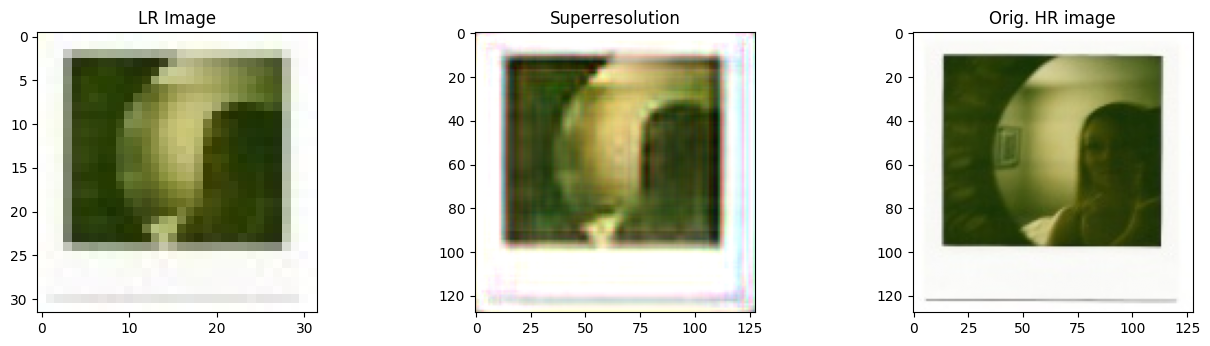

In [ ]:
from keras.models import load_model
from numpy.random import randint
import tensorflow as tf

generator = load_model('/content/drive/MyDrive/Image datasets/data/models/Student/gen2_op.h5', compile=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, weight_decay=0.0, amsgrad=False)

generator.compile(optimizer=optimizer,
              loss=["binary_crossentropy", "mse"],
              metrics=['accuracy'])

[X1, X2] = [lr_test, hr_test]
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]

# generate image from source
gen_image_s = generator(src_image, training = False)


# plot all three images

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('LR Image')
plt.imshow(src_image[0,:,:,:])
plt.subplot(232)
plt.title('Superresolution')
plt.imshow(gen_image_s[0,:,:,:])
plt.subplot(233)
plt.title('Orig. HR image')
plt.imshow(tar_image[0,:,:,:])

plt.show()

# Teacher

1/1 [==============================] - 1s 1s/step


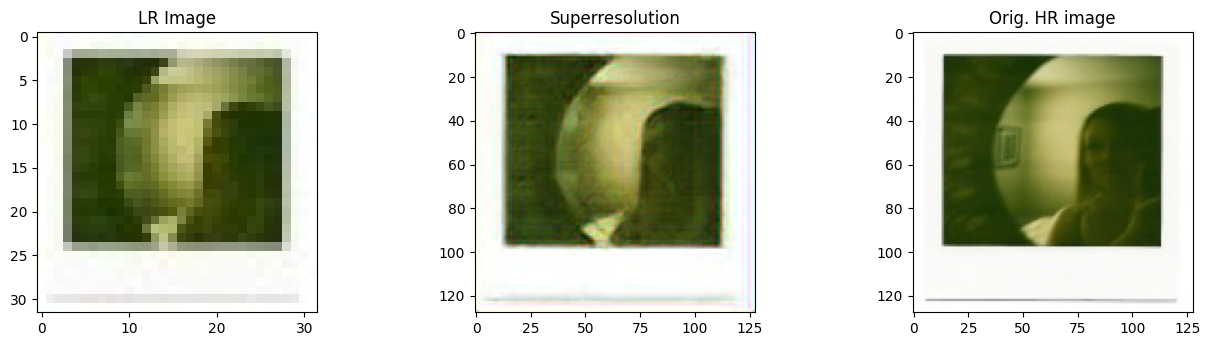

In [ ]:
Teacher = load_model('/content/drive/MyDrive/Image datasets/data/models/gen7_e_plus6.h5', compile=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, weight_decay=0.0, amsgrad=False)

Teacher.compile(optimizer=optimizer,
              loss=["binary_crossentropy", "mse"],
              metrics=['accuracy'])

#[X1, X2] = [lr_test, hr_test]
# select random example
#ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]

# generate image from source
gen_image_t = Teacher.predict(src_image)


# plot all three images

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('LR Image')
plt.imshow(src_image[0,:,:,:])
plt.subplot(232)
plt.title('Superresolution')
plt.imshow(gen_image_t[0,:,:,:])
plt.subplot(233)
plt.title('Orig. HR image')
plt.imshow(tar_image[0,:,:,:])

plt.show()

In [ ]:
print(ix)

[267]


PSNR:

In [ ]:
# IF UINT8
#psnr1 = tf.image.psnr(im1, im2, max_val=255)

# IF FLOAT32:
psnr_t = tf.image.psnr(gen_image_t, tar_image, max_val=1.0)
print("==========================================PSNR=============================================\n")
print("Teacher: " + str(tf.get_static_value(psnr_t)))
psnr_s = tf.image.psnr(gen_image_s, tar_image, max_val=1.0)
#print("PSNR:\n")
print("Student: " + str(tf.get_static_value(psnr_s)))



==========================================PSNR=============================================

Teacher: [23.702679]
Student: [18.97052]


SSIM:

In [ ]:
hr = np.float32(tar_image)
input_t = np.float32(gen_image_t)
input_s = np.float32(gen_image_s)

ssim_hr = tf.image.rgb_to_grayscale(hr)
input_t = tf.image.rgb_to_grayscale(input_t)
input_s = tf.image.rgb_to_grayscale(input_s)


ssim_t = tf.image.ssim(input_t, ssim_hr, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)

ssim_s = tf.image.ssim(input_s, ssim_hr, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)

print("==========================================SSIM=============================================\n")
print("Teacher: " + str(tf.get_static_value(ssim_t)))
print("Student: " + str(tf.get_static_value(ssim_s)))

==========================================SSIM=============================================

Teacher: [0.82190186]
Student: [0.6727608]


# APPLICATION SPECIFIC TESTING:

Student

In [ ]:
from keras.models import load_model
from numpy.random import randint
import tensorflow as tf

generator = load_model('/content/drive/MyDrive/Image datasets/data/models/Student/gen2_op.h5', compile=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, weight_decay=0.0, amsgrad=False)

generator.compile(optimizer=optimizer,
              loss=["binary_crossentropy", "mse"],
              metrics=['accuracy'])


Teacher:

In [ ]:
Teacher = load_model('/content/drive/MyDrive/Image datasets/data/models/gen7_e_plus6.h5', compile=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, weight_decay=0.0, amsgrad=False)

Teacher.compile(optimizer=optimizer,
              loss=["binary_crossentropy", "mse"],
              metrics=['accuracy'])

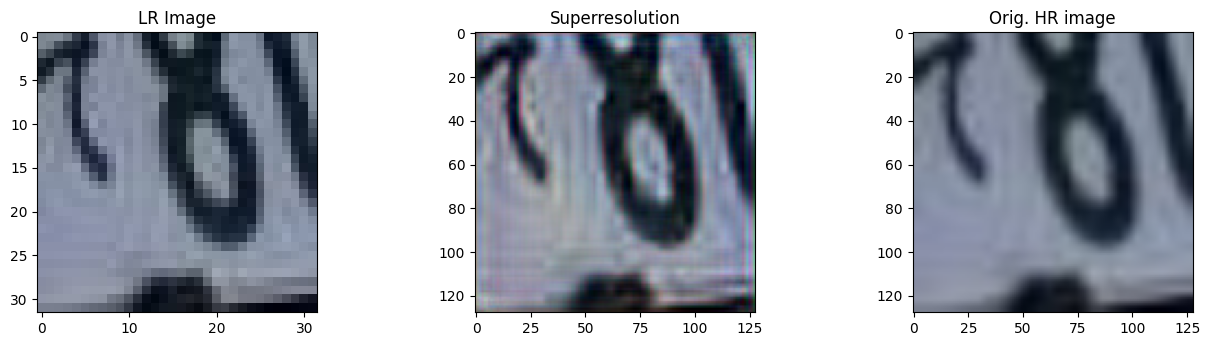

In [ ]:
#input = cv2.imread("/content/drive/MyDrive/Real_Test.jpg")

input = cv2.imread("/content/block_704_1536.jpg")


input_hr = cv2.resize(input, (128,128))

#input_lr = cv2.resize(input, (32,32))
input_lr = input

input_lr = cv2.cvtColor(input_lr,cv2.COLOR_BGR2RGB)
input_hr = cv2.cvtColor(input_hr,cv2.COLOR_BGR2RGB)

lr_img = []
hr_img = []

lr_img.append(input_lr)
hr_img.append(input_hr)

lr_img = np.array(lr_img)
hr_img = np.array(hr_img)

lr_img = lr_img / 255.
hr_img = hr_img / 255.

input_lr = np.expand_dims(input_lr, axis=0)
input_hr = np.expand_dims(input_hr, axis=0)

#generated_output = generator.predict(input_lr)
gen_image_s = generator(lr_img, training = True)
gen_image_t = Teacher(lr_img, training = False)

#generator.save("/content/drive/MyDrive/Image datasets/data/models/gen7_e_plus5"+".h5")

# plot all three images
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('LR Image')
plt.imshow(input_lr[0,:,:,:])
plt.subplot(232)
plt.title('Superresolution')
plt.imshow(gen_image_s[0,:,:,:])
plt.subplot(233)
plt.title('Orig. HR image')
plt.imshow(input_hr[0,:,:,:])

plt.show()

 Teacher output

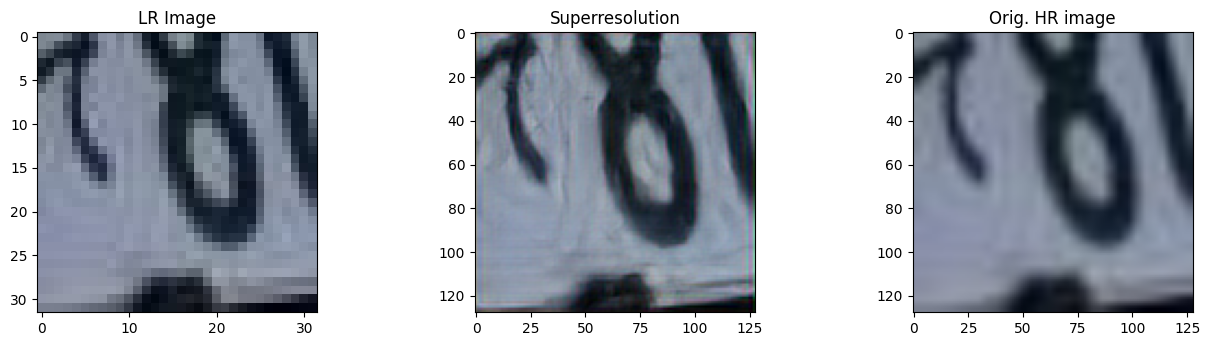

In [ ]:
# plot all three images
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('LR Image')
plt.imshow(input_lr[0,:,:,:])
plt.subplot(232)
plt.title('Superresolution')
plt.imshow(gen_image_t[0,:,:,:])
plt.subplot(233)
plt.title('Orig. HR image')
plt.imshow(input_hr[0,:,:,:])

plt.show()

PSNR:

In [ ]:
# IF UINT8
#psnr1 = tf.image.psnr(im1, im2, max_val=255)

# IF FLOAT32:
psnr_t = tf.image.psnr(gen_image_t, input_hr, max_val=1.0)
print("==========================================PSNR=============================================\n")
print("Teacher: " + str(tf.get_static_value(psnr_t)))
psnr_s = tf.image.psnr(gen_image_s, input_hr, max_val=1.0)
#print("PSNR:\n")
print("Student: " + str(tf.get_static_value(psnr_s)))



==========================================PSNR=============================================

Teacher: [26.422329]
Student: [24.899908]


SSIM:

In [ ]:
hr = np.float32(input_hr)
input_t = np.float32(gen_image_t)
input_s = np.float32(gen_image_s)

ssim_hr = tf.image.rgb_to_grayscale(hr)
input_t = tf.image.rgb_to_grayscale(input_t)
input_s = tf.image.rgb_to_grayscale(input_s)


ssim_t = tf.image.ssim(input_t, ssim_hr, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)

ssim_s = tf.image.ssim(input_s, ssim_hr, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)

print("==========================================SSIM=============================================\n")
print("Teacher: " + str(tf.get_static_value(ssim_t)))
print("Student: " + str(tf.get_static_value(ssim_s)))

==========================================SSIM=============================================

Teacher: [7.205995e-05]
Student: [8.4573374e-05]


# Full Dataset Testing:

In [ ]:
from keras.models import load_model
from numpy.random import randint
import tensorflow as tf

generator = load_model('/content/drive/MyDrive/Image datasets/data/models/Student/gen4.h5', compile=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, weight_decay=0.0, amsgrad=False)

generator.compile(optimizer=optimizer,
              loss=["binary_crossentropy", "mse"],
              metrics=['accuracy'])

Teacher = load_model('/content/drive/MyDrive/Image datasets/data/models/gen7_e_plus6.h5', compile=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, weight_decay=0.0, amsgrad=False)

Teacher.compile(optimizer=optimizer,
              loss=["binary_crossentropy", "mse"],
              metrics=['accuracy'])
psnr_Teacher = []
psnr_Student = []

ssim_Teacher = []
ssim_Student = []

[X1, X2] = [lr_test, hr_test]
# select random example

for ix in range(len(X1)):

  clear_output()
  print(str(ix))
  src_image, tar_image = X1[ix], X2[ix]

  src_image = np.expand_dims(src_image, axis=0)
  tar_image = np.expand_dims(tar_image, axis=0)

  # generate image from source
  gen_image_s = generator(src_image, training = False)
  gen_image_t = Teacher(src_image, training = False)

  #=================================== PSNR ===================================
  psnr_t = tf.image.psnr(gen_image_t, tar_image, max_val=1.0)
  psnr_Teacher.append(tf.get_static_value(psnr_t))
  psnr_s = tf.image.psnr(gen_image_s, tar_image, max_val=1.0)
  psnr_Student.append(tf.get_static_value(psnr_s))

  #=================================== SSIM ===================================
  hr = np.float32(tar_image)
  input_t = np.float32(gen_image_t)
  input_s = np.float32(gen_image_s)

  ssim_hr = tf.image.rgb_to_grayscale(hr)
  input_t = tf.image.rgb_to_grayscale(input_t)
  input_s = tf.image.rgb_to_grayscale(input_s)


  ssim_t = tf.image.ssim(input_t, ssim_hr, max_val=1.0, filter_size=11,
                            filter_sigma=1.5, k1=0.01, k2=0.03)

  ssim_s = tf.image.ssim(input_s, ssim_hr, max_val=1.0, filter_size=11,
                            filter_sigma=1.5, k1=0.01, k2=0.03)

  ssim_Teacher.append(tf.get_static_value(ssim_t))
  ssim_Student.append(tf.get_static_value(ssim_s))

# =============== AVG ==================
psnr_Teacher = np.array(psnr_Teacher)
psnr_Student = np.array(psnr_Student)

ssim_Teacher = np.array(ssim_Teacher)
ssim_Student = np.array(ssim_Student)

avg_psnr_Teacher = np.sum(psnr_Teacher, axis=0)/len(psnr_Teacher)
avg_psnr_Student = np.sum(psnr_Student, axis=0)/len(psnr_Student)

avg_ssim_Teacher = np.sum(ssim_Teacher, axis=0)/len(ssim_Teacher)
avg_ssim_Student = np.sum(ssim_Student, axis=0)/len(ssim_Student)

print( "RESULTS FOR TEST DATASET: " + str(len(lr_test)) + " IMAGES")
print("============================== PSNR ==============================")
print("Teacher: " + str(avg_psnr_Teacher) + " dB")
print("Student: " + str(avg_psnr_Student) + " dB")

print("============================== SSIM ==============================")
print("Teacher: " + str(avg_ssim_Teacher))
print("Student: " + str(avg_ssim_Student))



939
RESULTS FOR TEST DATASET: 940 IMAGES
============================== PSNR ==============================
Teacher: [21.533548] dB
Student: [21.4609] dB
============================== SSIM ==============================
Teacher: [0.637834]
Student: [0.6388872]


# SRGAN & BICUBIC

In [ ]:
from keras.models import load_model
from numpy.random import randint
import tensorflow as tf


Teacher = load_model('/content/drive/MyDrive/Image datasets/data/SRGAN Models/gen_e_15.h5', compile=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, weight_decay=0.0, amsgrad=False)

Teacher.compile(optimizer=optimizer,
              loss=["binary_crossentropy", "mse"],
              metrics=['accuracy'])
psnr_Teacher = []
psnr_Student = []

ssim_Teacher = []
ssim_Student = []

[X1, X2] = [lr_test, hr_test]
# select random example

for ix in range(len(X1)):

  clear_output()
  print(str(ix))
  src_image, tar_image = X1[ix], X2[ix]

  src_image = np.expand_dims(src_image, axis=0)
  tar_image = np.expand_dims(tar_image, axis=0)

  # generate image from source
  gen_image_s = tf.image.resize(src_image, [128,128], method='bicubic')
  gen_image_t = Teacher(src_image, training = False)

  #=================================== PSNR ===================================
  psnr_t = tf.image.psnr(gen_image_t, tar_image, max_val=1.0)
  psnr_Teacher.append(tf.get_static_value(psnr_t))
  psnr_s = tf.image.psnr(gen_image_s, tar_image, max_val=1.0)
  psnr_Student.append(tf.get_static_value(psnr_s))

  #=================================== SSIM ===================================
  hr = np.float32(tar_image)
  input_t = np.float32(gen_image_t)
  input_s = np.float32(gen_image_s)

  ssim_hr = tf.image.rgb_to_grayscale(hr)
  input_t = tf.image.rgb_to_grayscale(input_t)
  input_s = tf.image.rgb_to_grayscale(input_s)


  ssim_t = tf.image.ssim(input_t, ssim_hr, max_val=1.0, filter_size=11,
                            filter_sigma=1.5, k1=0.01, k2=0.03)

  ssim_s = tf.image.ssim(input_s, ssim_hr, max_val=1.0, filter_size=11,
                            filter_sigma=1.5, k1=0.01, k2=0.03)

  ssim_Teacher.append(tf.get_static_value(ssim_t))
  ssim_Student.append(tf.get_static_value(ssim_s))

# =============== AVG ==================
psnr_Teacher = np.array(psnr_Teacher)
psnr_Student = np.array(psnr_Student)

ssim_Teacher = np.array(ssim_Teacher)
ssim_Student = np.array(ssim_Student)

avg_psnr_Teacher = np.sum(psnr_Teacher, axis=0)/len(psnr_Teacher)
avg_psnr_Student = np.sum(psnr_Student, axis=0)/len(psnr_Student)

avg_ssim_Teacher = np.sum(ssim_Teacher, axis=0)/len(ssim_Teacher)
avg_ssim_Student = np.sum(ssim_Student, axis=0)/len(ssim_Student)

print( "RESULTS FOR TEST DATASET: " + str(len(lr_test)) + " IMAGES")
print("============================== PSNR ==============================")
print("SRGAN: " + str(avg_psnr_Teacher) + " dB")
print("BICUBIC: " + str(avg_psnr_Student) + " dB")

print("============================== SSIM ==============================")
print("SRGAN: " + str(avg_ssim_Teacher))
print("BICUBIC: " + str(avg_ssim_Student))



939
RESULTS FOR TEST DATASET: 940 IMAGES
============================== PSNR ==============================
SRGAN: [16.997307] dB
BICUBIC: [23.178284] dB
============================== SSIM ==============================
SRGAN: [0.56118906]
BICUBIC: [0.684501]
